In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mp


In [ ]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

np.random.normal(-30,30)    
    

-15.09857540966302

In [ ]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

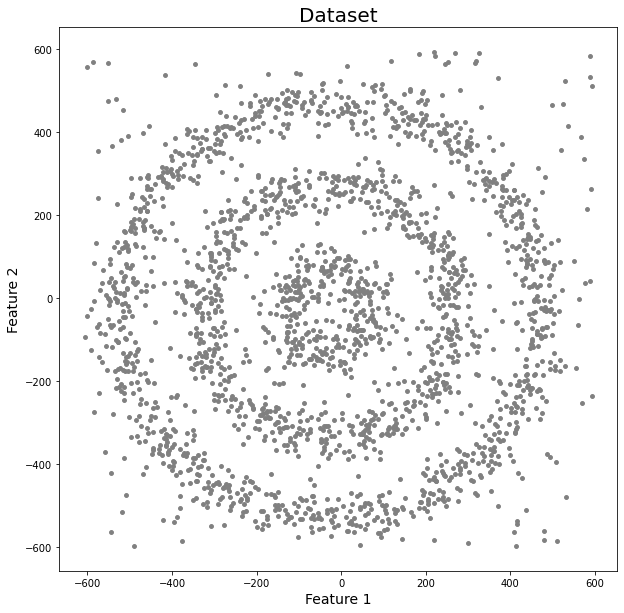

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

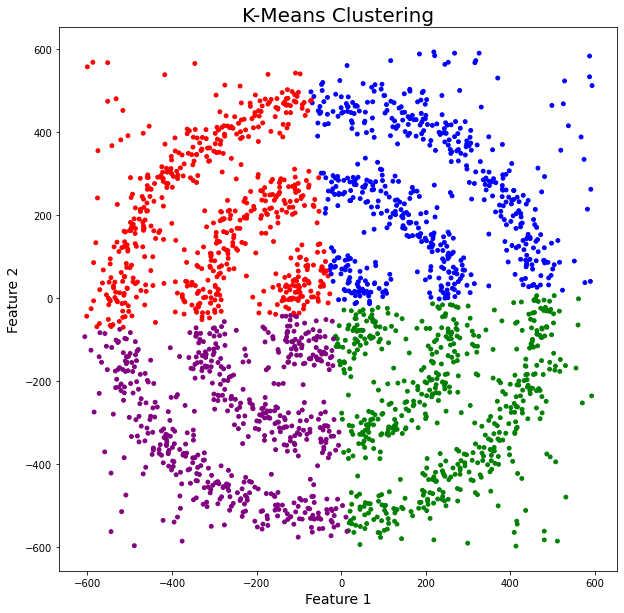

In [ ]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=mp.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

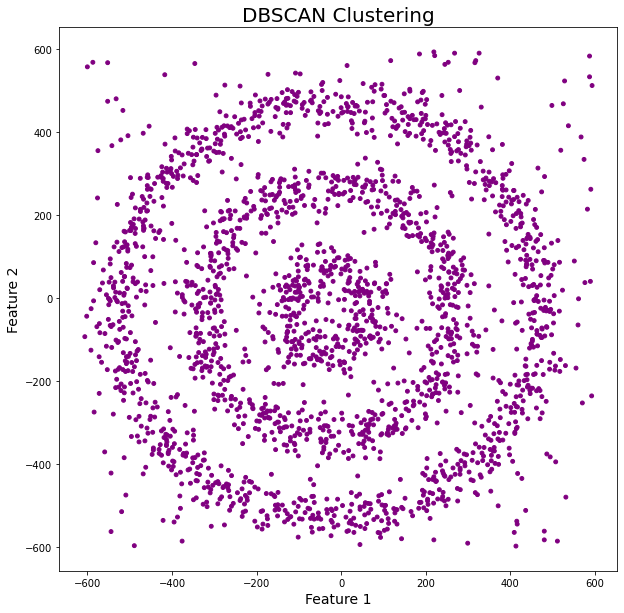

In [ ]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1] ,c=df['DBSCAN_labels'],cmap=mp.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])
distances

array([[ 0.        ,  9.36792745],
       [ 0.        , 14.99161403],
       [ 0.        ,  9.63933538],
       ...,
       [ 0.        ,  8.15135314],
       [ 0.        , 21.84032967],
       [ 0.        , 14.92216447]])

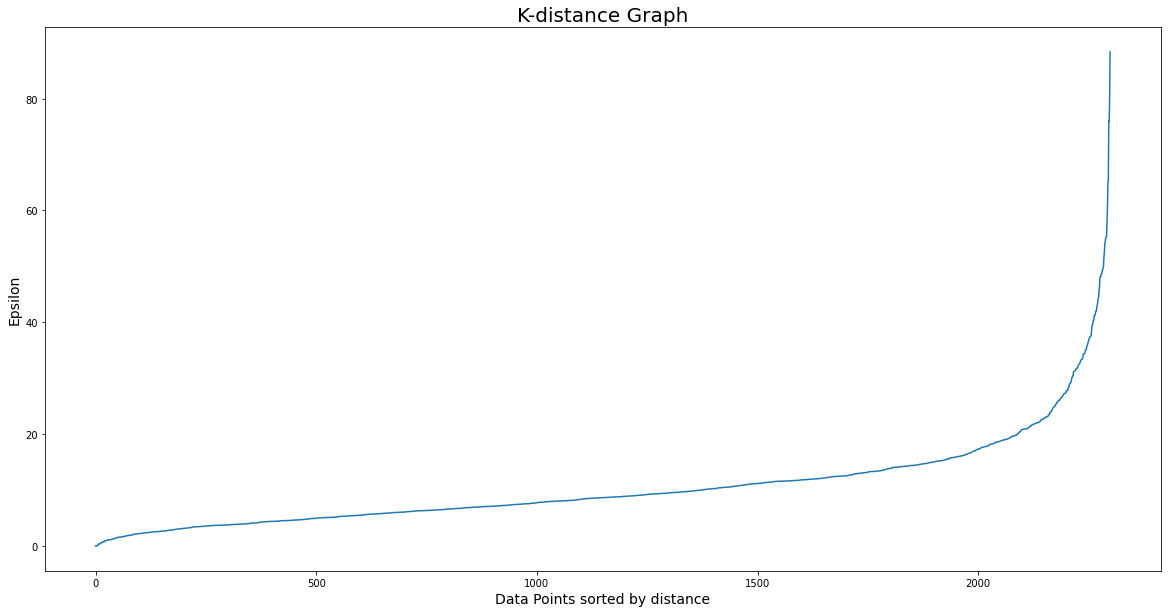

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
dbscan_opt = DBSCAN(eps =30,min_samples=6)

In [ ]:
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [ ]:
df['DB_opt_labels'] = dbscan_opt.labels_

In [ ]:
df['DB_opt_labels'].value_counts()

 5    729
 4    416
 6    316
 2    255
-1    221
 0    160
 3    107
 1     96
Name: DB_opt_labels, dtype: int64

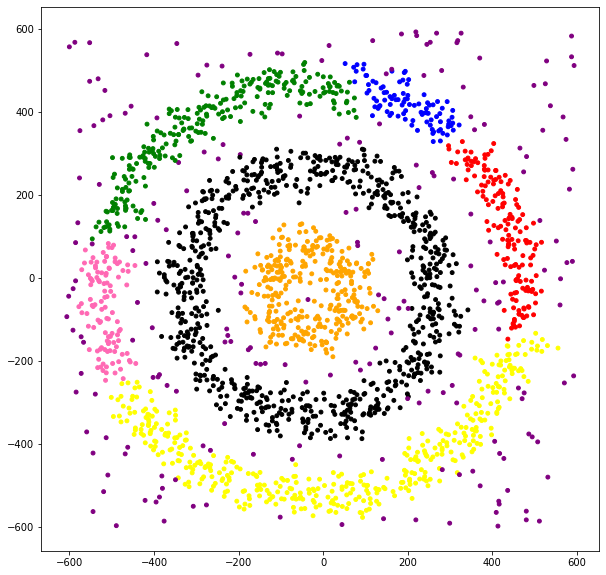

In [ ]:
colors=['purple','red','blue','green','hotpink','yellow','black','orange']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1] ,c=df['DB_opt_labels'],cmap=mp.colors.ListedColormap(colors),s=15)
plt.show()